In [1]:
import cv2
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from google.colab import files

In [2]:
points = []

Needed if ipympl throws error

In [3]:
!pip install --upgrade matplotlib ipympl

In [4]:
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        print(f'Clicked point: ({x}, {y})')
        points.append([x, y, 1])

        plt.scatter(x, y, color='red')
        plt.draw()

        if len(points) == 4:
            print("Finished selecting points:")
            print(points)
            fig.canvas.mpl_disconnect(cid)

In [5]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving image_with_distortion.png to image_with_distortion (7).png


Select 4 points (from top left, clockwise)

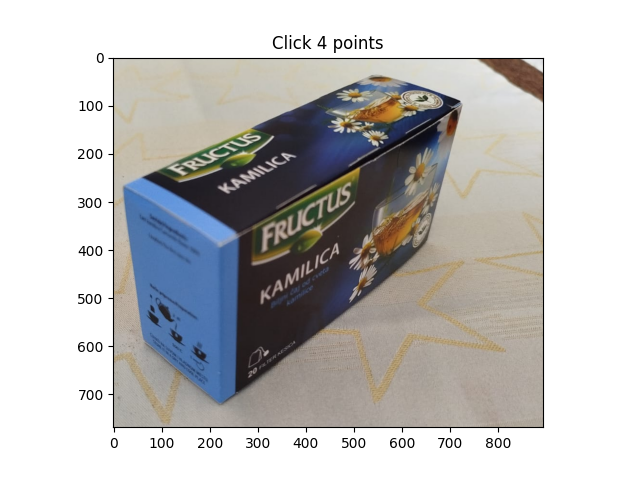

Clicked point: (215, 383)
Clicked point: (720, 89)
Clicked point: (654, 381)
Clicked point: (223, 720)
Finished selecting points:
[[215, 383, 1], [720, 89, 1], [654, 381, 1], [223, 720, 1]]


In [6]:
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(image_rgb)
ax.set_title("Click 4 points")
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Import DLT function from first part of homework

In [7]:
!curl -L -o DLT.ipynb https://raw.githubusercontent.com/VeljkoDeljanin/APGC-homework/main/homework-2/DLT.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2847  100  2847    0     0  16371      0 --:--:-- --:--:-- --:--:-- 16362


In [8]:
%run DLT.ipynb

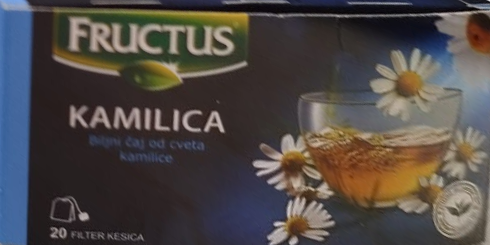

In [9]:
width = 490
height = 245

orig_pts = np.array(points)

img_pts = np.array([[0, 0, 1], [width - 1, 0, 1], [width - 1, height - 1, 1], [0, height - 1, 1]])

P = DLT(orig_pts, img_pts)

new_image = cv2.warpPerspective(image, P, (width, height))

from google.colab.patches import cv2_imshow
cv2_imshow(new_image)